# Business Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. 

It will also help predict one's chances of admission given the rest of the variables.

# Column Profiling:

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style = 'darkgrid' , color_codes=True)
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error


# 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [2]:
df=pd.read_csv('jamboree_admission.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#checking null values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Observations:
* Given Data contains details of 500 students who were given GRE Exam
* All the students have GRE score in between [290,340] with an average score of 317
* All the students have TOEFL score in between [92,120] with an average score of 107
* All the students have CGPA in between [6.8,9.92] with an average score of 8.56
* There are no null values and duplicates in the given Data
* Given data has no categorical columns and all the columns are either int or float

## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [8]:
col=list(df.columns)
col


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [9]:
df['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

In [10]:
df['Research'].value_counts(normalize=True)

1    0.56
0    0.44
Name: Research, dtype: float64

* GRE Score doesnt follow normal distribution p_val:1.9205080572479553e-06
* TOEFL Score doesnt follow normal distribution p_val:3.24877511690625e-05
* University Rating doesnt follow normal distribution p_val:7.229797762563391e-10
* SOP doesnt follow normal distribution p_val:3.210143902779084e-07
* LOR  doesnt follow normal distribution p_val:8.472184961452618e-08
* CGPA doesnt follow normal distribution p_val:0.0018221915300750521
* Research doesnt follow normal distribution p_val:0.0
* Chance of Admit  doesnt follow normal distribution p_val:0.0009863350939806794


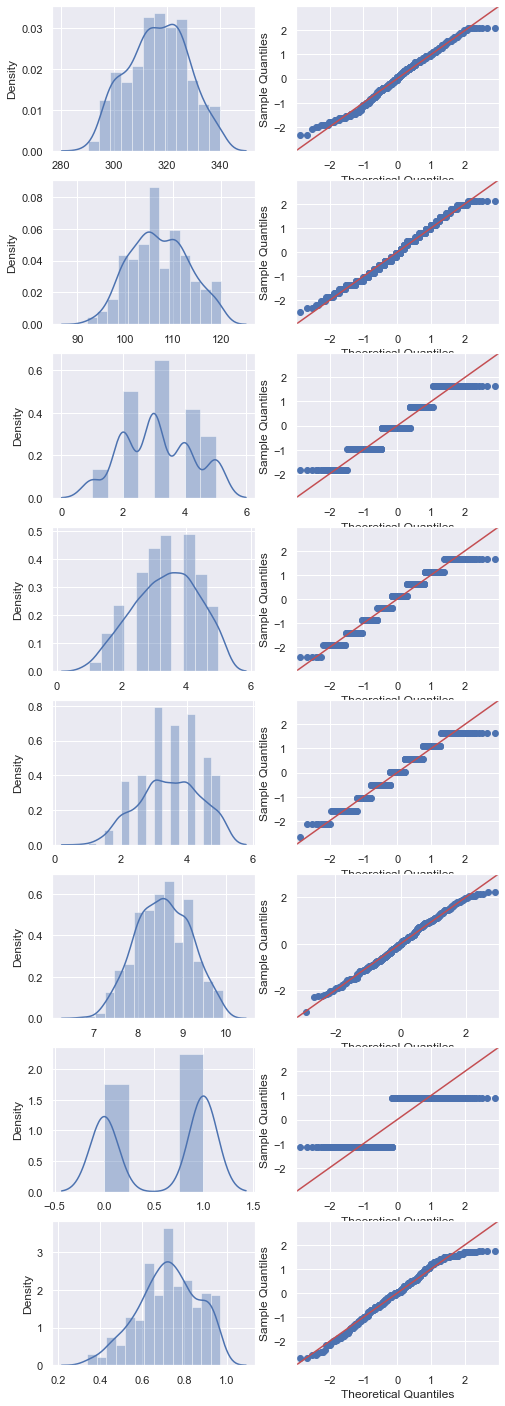

In [11]:
#Density plots for Columns
col=['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']
fig, axes = plt.subplots(8, 2, figsize=(8, 25))
for i in range(len(col)):
    
    sns.distplot(ax=axes[i, 0],x=df[col[i]])
    sm.qqplot(df[col[i]],line='45',fit=True,dist=stats.norm,ax=axes[i, 1])
    p=stats.normaltest(df[col[i]]).pvalue
    if p<0.05:
        print('* '+col[i]+' doesnt follow normal distribution p_val:'+str(p))
    else:
        print('* '+col[i]+' follow normal distribution p_val:'+str(p))


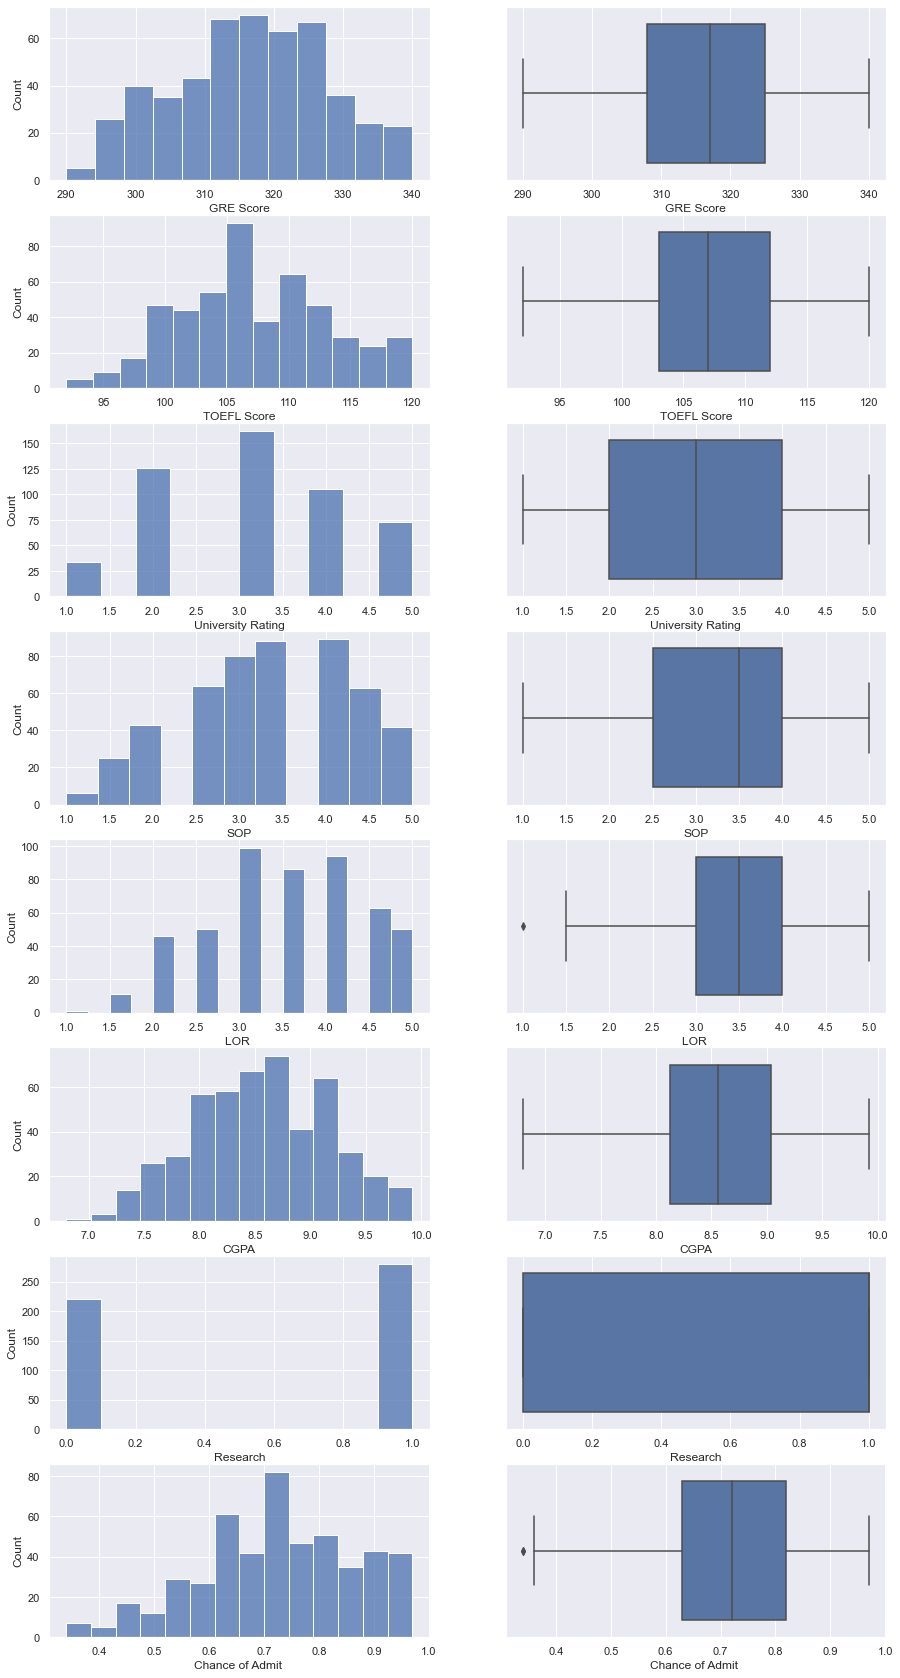

In [12]:
#histograms for all the columns and checking outliers
col= ['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']
fig, axes = plt.subplots(8, 2, figsize=(15, 30))
for i in range(len(col)):
    sns.histplot(df[col[i]],ax=axes[i,0])
    sns.boxplot(df[col[i]],ax=axes[i,1])

### BIVARIATE ANALYSIS

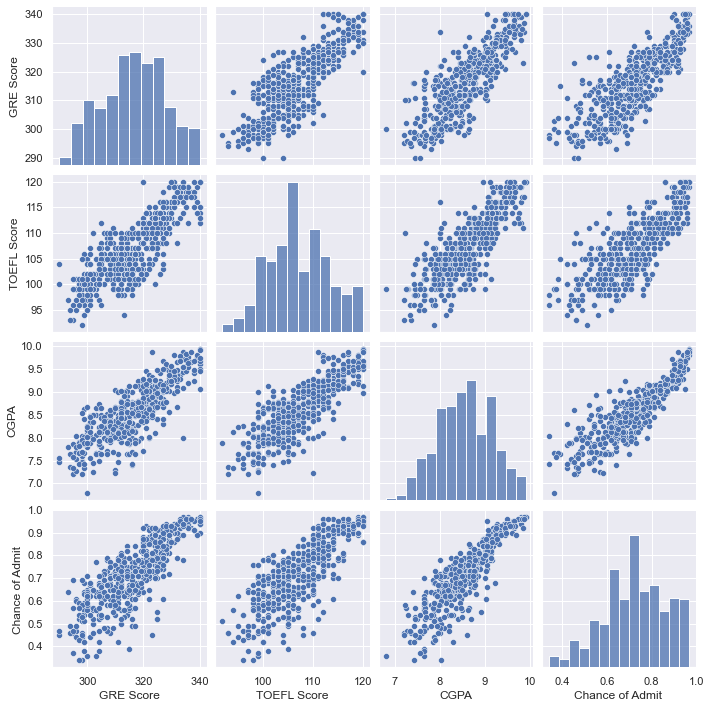

In [13]:
cols=['GRE Score',
 'TOEFL Score',
  'CGPA','Chance of Admit ']
sns.pairplot(df[cols])

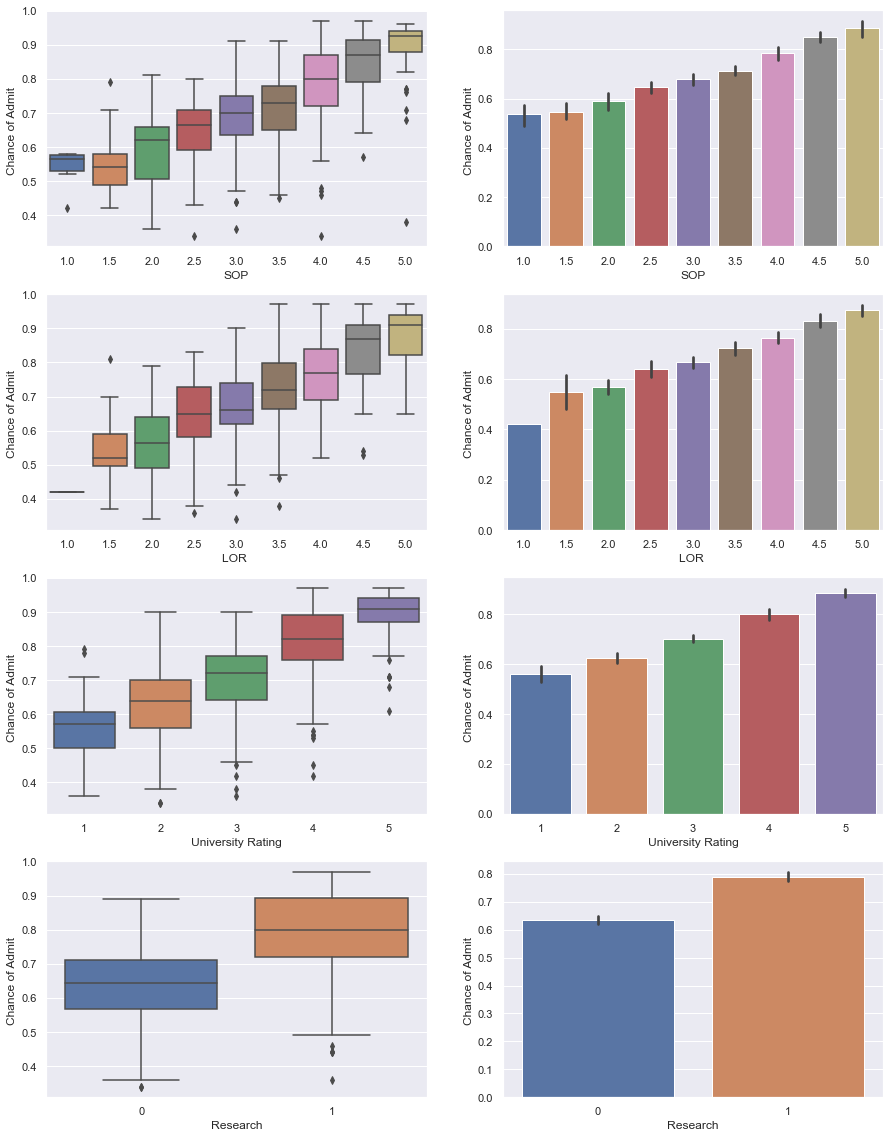

In [14]:
cols1=['SOP','LOR ','University Rating','Research']
fig, axes = plt.subplots(4, 2, figsize=(15,20))
for i in range(len(cols1)):
    sns.boxplot(df[cols1[i]],df['Chance of Admit '],ax=axes[i,0])
    sns.barplot(df[cols1[i]],df['Chance of Admit '],ax=axes[i,1])
    
   

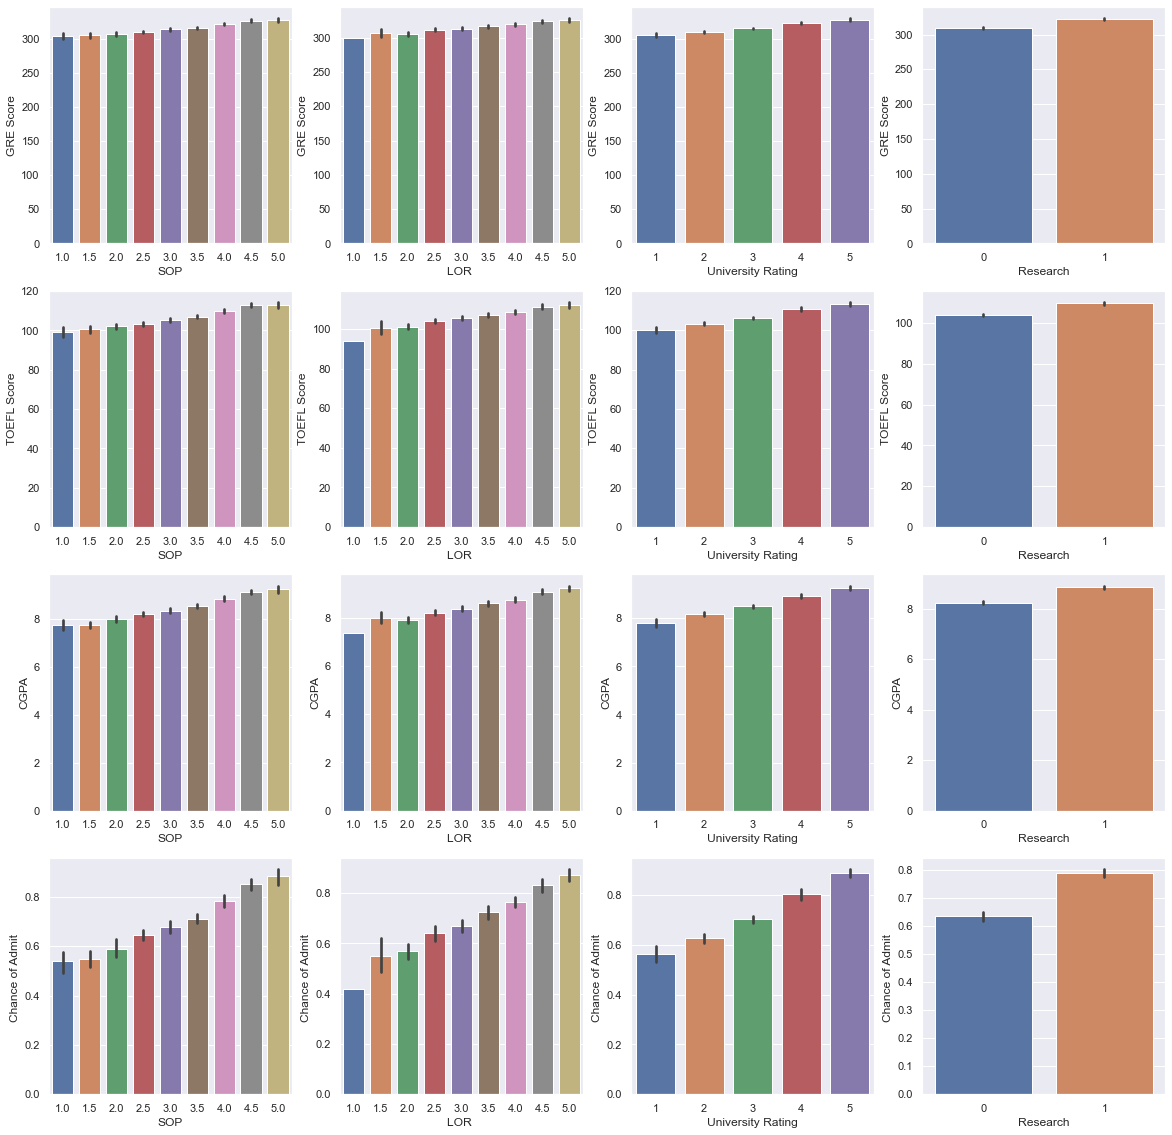

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
for i in range(len(cols)):
    for j in range(len(cols1)):
        sns.barplot(df[cols1[j]],df[cols[i]],ax=axes[i,j])

# MultiVariate Analysis

<AxesSubplot:>

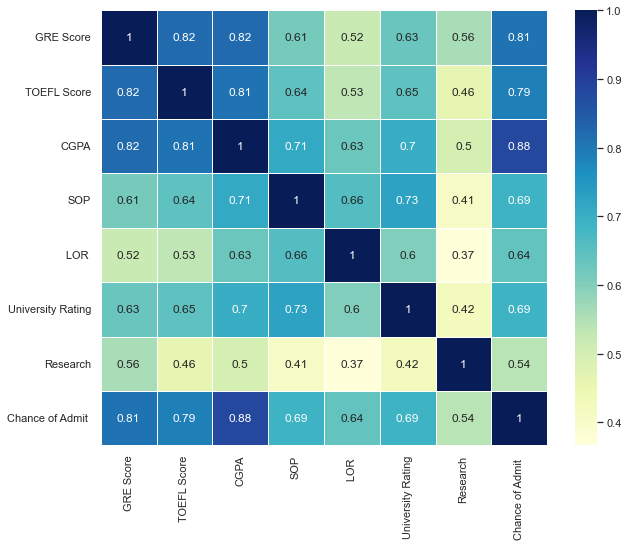

In [57]:
col= ['GRE Score',
 'TOEFL Score',
 'CGPA',
 'SOP',
 'LOR ',
 'University Rating',
 'Research',
 'Chance of Admit ']
plt.figure(figsize=(10, 8))
sns.heatmap(df[col].corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

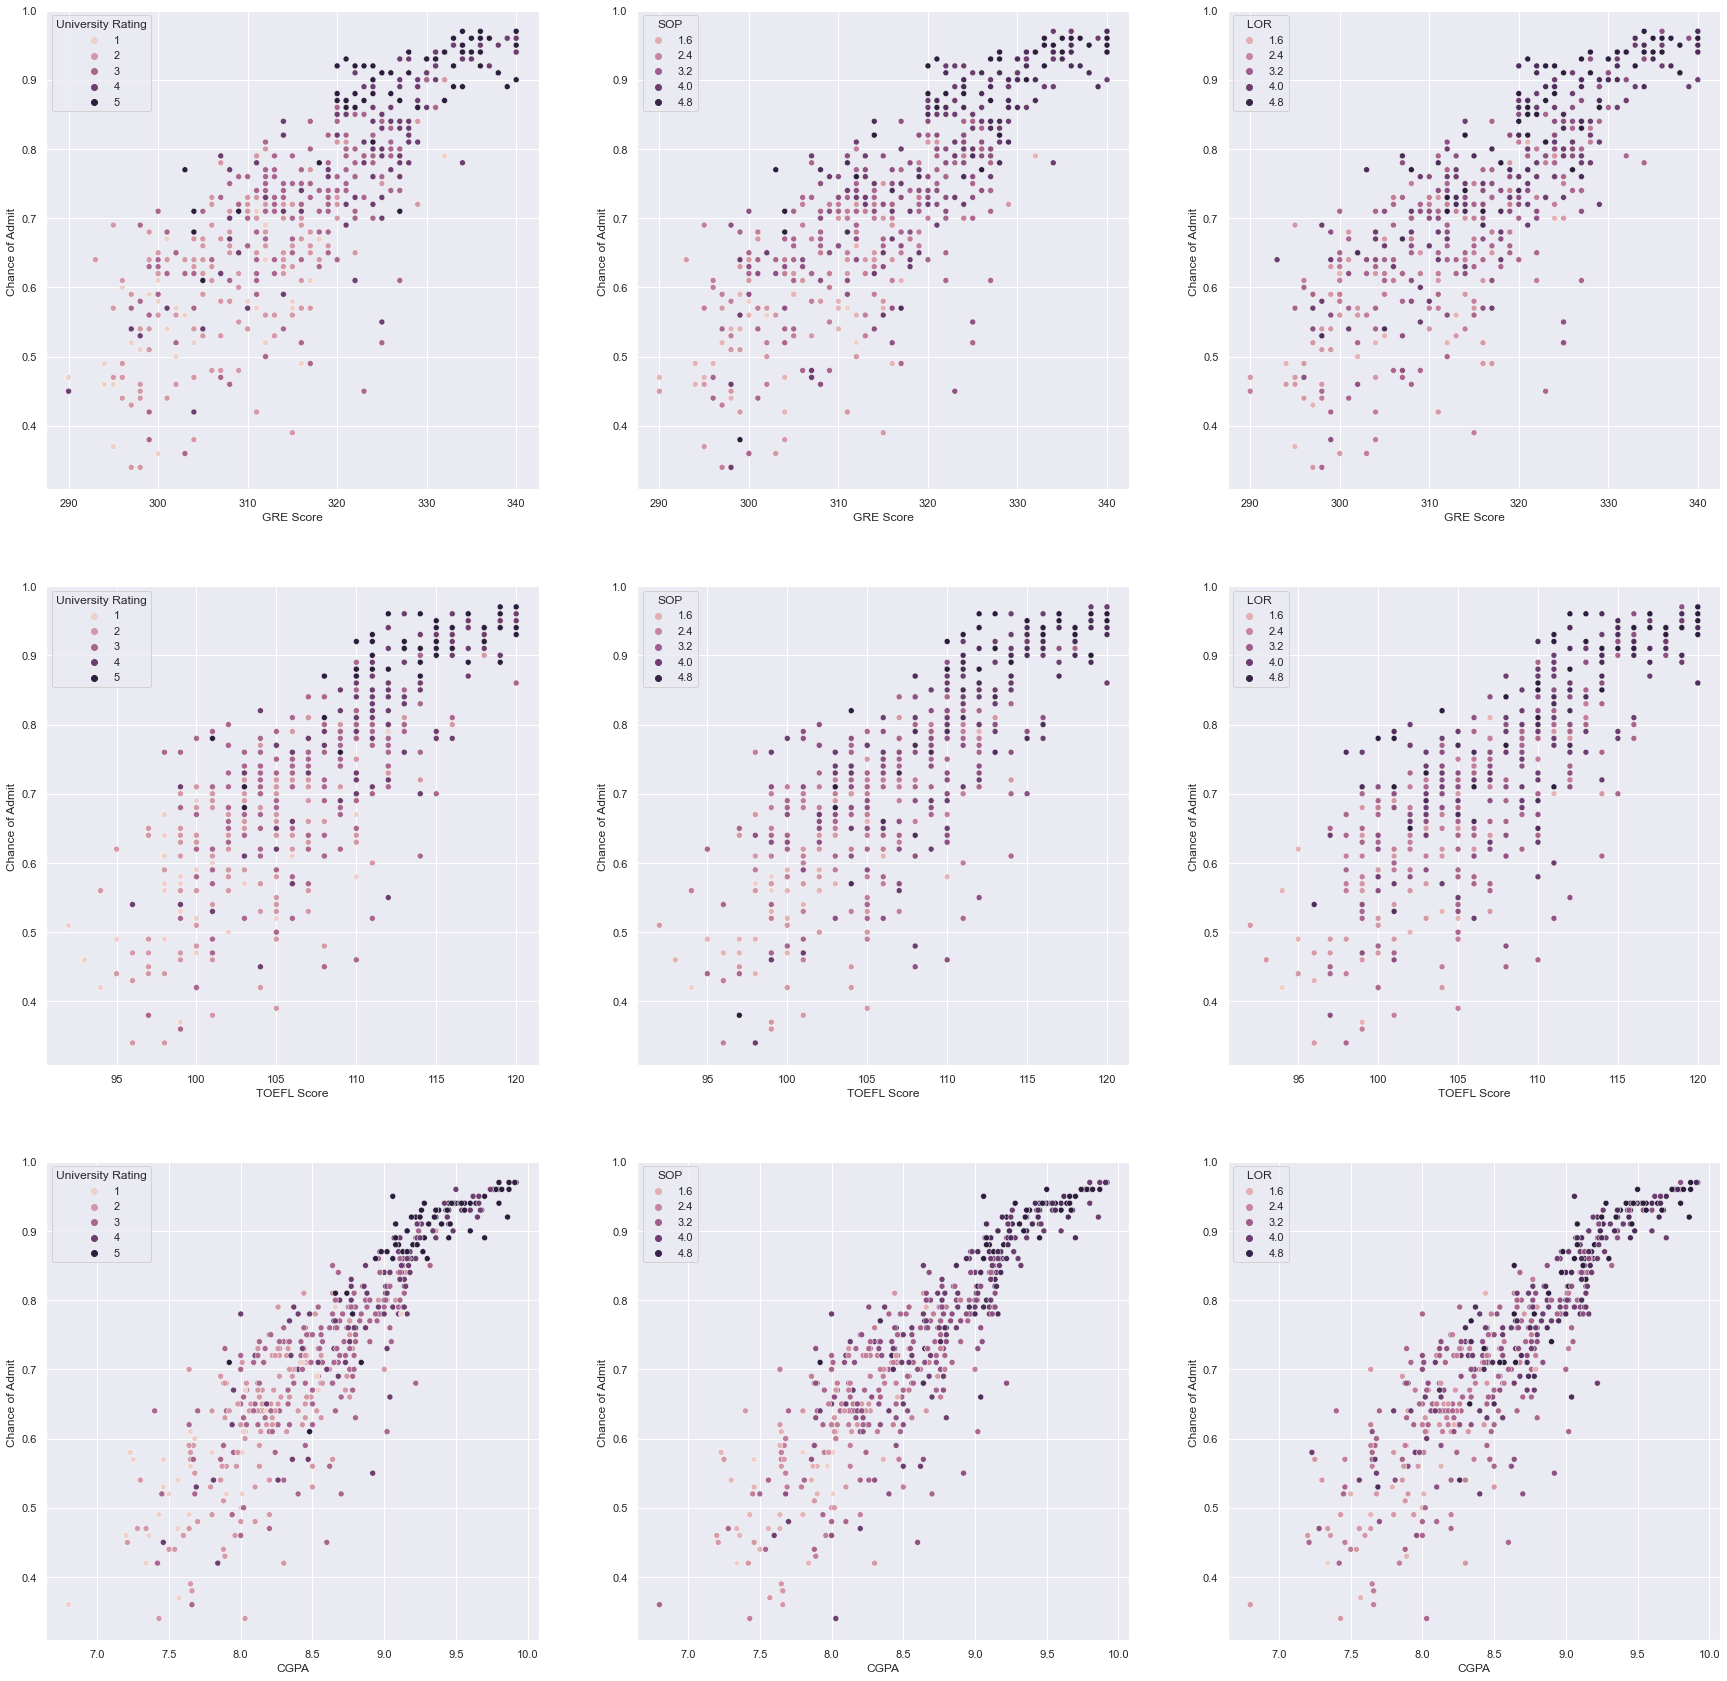

In [17]:
col1=['GRE Score','TOEFL Score','CGPA']
col2=['University Rating','SOP','LOR ']
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
for i in range(len(col1)):
    for j in range(len(col2)):
        
        sns.scatterplot(df[col1[i]],df['Chance of Admit '],hue=df[col2[j]],ax=axes[i,j])

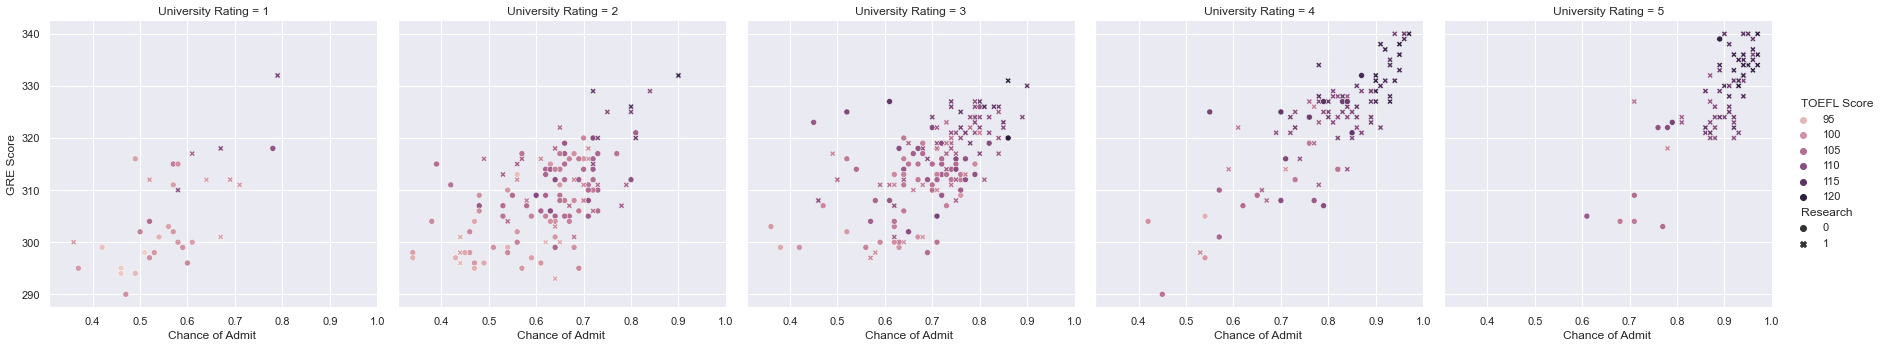

In [18]:
rp = sns.relplot(data = df,
x = 'Chance of Admit ',
y = 'GRE Score',
col = 'University Rating',
hue = 'TOEFL Score',
style='Research')

## Illustrate the insights based on EDA
* Comments on range of attributes, outliers of various attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots

#### Observations:
* People who do research are more likely to get admission that who doesn’t do research
* out of 500 students , 56 percent of the students have Research experience and 44 percent of the students doesn’t have Research experience
* 32% of the universities are of rating 3 and 25% of the universities are of rating 2 and 21 percent o
* Chances of student getting admitted is around 0.7
* GRE,TOEFL,CGPA are highly correlated with each other and there also have high correlation with chance of admit 
* Chances of student having research experience getting into university with rating 5 is greater than student who doesn’t have research experience
* Student having research experience are more likely to join universities with rating 3,4,5
* Students with less GRE score are likely to join Universities with rating 1,2 and 3 
* All the given variables positively correlated with each other and none of the variables are negatively correlated 


# 2.Data Preprocessing 

## 2.1 & 2.2 Duplicate value check, Missing value treatment

In [19]:
#Checking Null/missing Values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
#checking duplicate values
df.duplicated().sum()

0

* There are no nulls or duplicates in given data

## 2.3 Outlier treatment

* We only have outliers in LOR and Chances of Admit column

In [21]:
#Removing out liers in Chances of admit and LOR

df=df[df['LOR ']>=(df['LOR '].quantile(0.25)-((df['LOR '].quantile(0.75)-df['LOR '].quantile(0.25))*1.5))]

In [22]:
df=df[df['Chance of Admit ']>=(df['Chance of Admit '].quantile(0.25)-((df['Chance of Admit '].quantile(0.75)-df['Chance of Admit '].quantile(0.25))*1.5))]

In [23]:
df.shape

(497, 9)

<AxesSubplot:xlabel='LOR '>

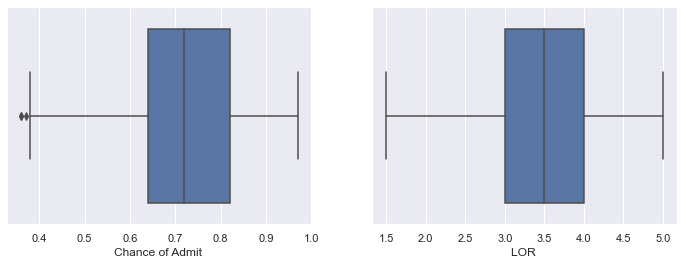

In [24]:
#After removing outliers in Chances of admit
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(df['Chance of Admit '],ax=axes[0])
sns.boxplot(df['LOR '],ax=axes[1])

## 2.4 Feature engineering and Data preparation for modeling

In [25]:
#Dropping the unique row Identifier
df.drop('Serial No.', axis=1, inplace=True)

In [26]:
col=['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

In [27]:
#Normalize/ Standardize the numerical columns using StandardScaler
df1=df
for i in col:
    df1[i] = StandardScaler().fit_transform(df1[[i]])


In [28]:
df1.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,0.92
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.76
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,0.72
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.80
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,0.65


* There are no categorical columns in given data

# 3.Model building

### Linear Regression:
* Linear regression is used for finding linear relationship between target and one or more predictors.
* There are two types of linear regression- Simple and Multiple.

#### Simple Linear Regression:
* Simple linear regression is useful for finding relationship between two continuous variables
* One is predictor or independent variable and other is response or dependent variable

#### Multiple linear regression:
* Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable

### Assumptions:
* Linear relationship
* Multivariate normality
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity

## 3.1 Build the Linear Regression model and comment on the model statistics

###### After Many trial and error methods  i have finalised below columns for building model

* By including all the features we have got Adj. R-squared score of 0.819
* After removing SOP and univerisity rating features we have got Adj. R-squared score of 0.816 .there is a drop of 0.003 which is very neligable . so i am going ahead with 5 variables to build model

In [58]:
col=['GRE Score',
 'TOEFL Score',
 'LOR ',
 'CGPA',
 'Research']

In [30]:
X=df1[col]
Y=df1['Chance of Admit ']

## Linear Regression module using stats model

In [31]:
X_1=sm.add_constant(X)
rm_1=sm.OLS(Y,X_1).fit()
print(rm_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     449.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.15e-180
Time:                        19:39:34   Log-Likelihood:                 703.89
No. Observations:                 497   AIC:                            -1396.
Df Residuals:                     491   BIC:                            -1371.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7239      0.003    273.229      

#### Insights from above stats table:

* Dependent Variable is Chance of Admit
* Total number of observations is 494
* Degrees of freedon (Df Residuals) is 488
* There has been 5 features included in the model
* The values of R-squared and Adjusted R-squared are 0.818 and 0.816. they are pretty close
* We have got a good score of R-squared and Adjusted R-squared that implies that many data points are close to the linear regression function line
* Prob(F-Statistic) tells the overall significance of the regression.The null hypothesis under this is “all the regression coefficients are equal to zero”. as the p value is less than 0.05,We can reject null hypothesis 
* coef of constant which is nothing but intercept (0.7261)
* coef represents strength of dependent variable with independent variable 
* As none of the coefficients are negitive , we can say all the features are positively related with dependent variable
* using P>|t| we can state that all the features are significant as all their p value is less than 0.05
* [0.025      0.975] gives 95% confidence interval

In [32]:
coef_1=list(rm_1.params)
for i in range(len(col)):
    print('Coefficent of '+col[i]+' is '+str(coef_1[i]))
print('Intercept is '+str(coef_1[0]))

Coefficent of GRE Score is 0.7238832997987931
Coefficent of TOEFL Score is 0.020348435206173875
Coefficent of LOR  is 0.017311261893890553
Coefficent of CGPA is 0.017572704955734358
Coefficent of Research is 0.07454138221461971
Intercept is 0.7238832997987931


## Linear Regression using SKLEARN 

In [33]:
rm=LinearRegression()
rm.fit(X,Y)

LinearRegression()

## 3.2 Display model coefficients with column names

In [34]:
rm.intercept_

0.7238832997987928

In [35]:
coef=rm.coef_

In [36]:
for i in range(len(col)):
    print('Coefficent of '+col[i]+' is '+str(coef[i]))
print('Intercept is '+str(rm.intercept_))

Coefficent of GRE Score is 0.020348435206173715
Coefficent of TOEFL Score is 0.01731126189389054
Coefficent of LOR  is 0.0175727049557343
Coefficent of CGPA is 0.07454138221461969
Coefficent of Research is 0.012252623751412499
Intercept is 0.7238832997987928


In [37]:
rm.score(X,Y)

0.820748264358058

In [38]:
print("Adjusted R-squared:", 1 - (1-rm.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))


Adjusted R-squared: 0.8189228902680179


* The results drawn using statmodels and sklearn are similar and close 

# 4.Testing the assumptions of the linear regression model

#### VIF SCORE :

VIF score of an independent variable represents how well the variable is explained by other independent variables.

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## 4.1 Multicollinearity check by VIF score 

In [39]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,GRE Score,4.39
3,CGPA,4.31
1,TOEFL Score,3.73
2,LOR,1.68
4,Research,1.48


* As All the features having VIF Score less than 5 ,we can say there is no high between this independent variable and the others

## 4.2 The Mean of residuals is nearly zero 

In [40]:
Y_pred = rm.predict(X)
residuals = Y.values-Y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(round(mean_residuals,5)))


Mean of Residuals 0.0


* Mean of residuals is nearly 0

## 4.3 Linearity of variables (no pattern in the residual plot)

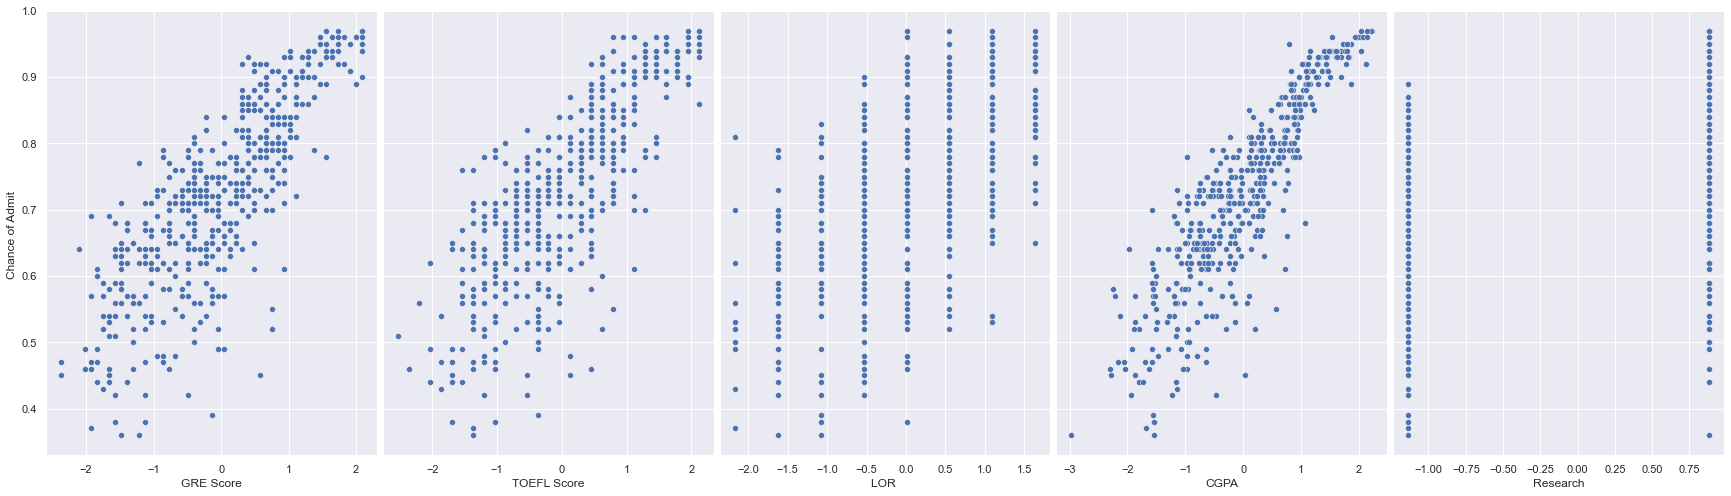

In [41]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df1, x_vars=col, y_vars='Chance of Admit ', size=7, aspect=0.7)

* By looking at the plots we can see that GRE Score,TOEFL Score and CGPA have a kind of Linear relation ship with Chances of Admit and other variables also have some kind of relation ship whith chance od admit

## 4.4 Test for Homoscedasticity

* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 
* By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

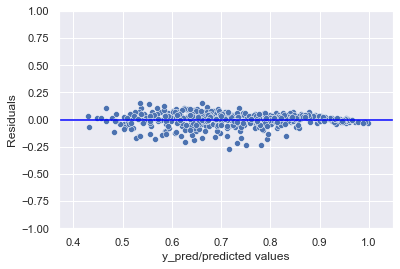

In [42]:
sns.scatterplot(Y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0.37,1.05)
p = sns.lineplot([0.37,1.05],[0,0],color='blue')


### Goldfeld Quandt Test to check Homoscedasticity 

Null Hypothesis: Error terms are not heteroscedastic.

Alternative Hypothesis: Error terms are heteroscedastic.

In [43]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F_stat','P_value']
GQT = sms.het_goldfeldquandt(residuals, X)
lzip(name,GQT)

[('F_stat', 0.47627161514657423), ('P_value', 0.999999994539627)]

* As p_value is more than 0.05 we go with Alternate Hypothesis(Error terms are heteroscedastic)

Hence We can say Residuals are heteroscedastic.

## 4.5 Normality of residuals

Residuals are not Normally Distributed 7.266953837434812e-24


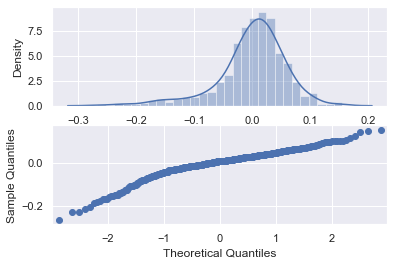

In [44]:

fig,axes=plt.subplots(2)
sns.distplot(residuals,ax=axes[0])
sm.qqplot(residuals,ax=axes[1])
p=stats.normaltest(residuals).pvalue

if p>0.05:
    print('Residuals are Normally Distributed '+str(p))
else:
    print('Residuals are not Normally Distributed '+str(p))


* Residuals are kind of left skewed normal distributions

# 5.Model performance evaluation

## 5.1 Metrics checked - MAE, RMSE, R2, Adj R2

In [45]:
print("Mean absolute error:", mean_absolute_error(Y_pred,Y))
print("Mean Squared error:", mean_squared_error(Y_pred,Y))
print("Root Mean squared error:", np.sqrt(mean_squared_error(Y_pred,Y)))
print("Mean absolute Percentage error:",mean_absolute_percentage_error(Y_pred,Y))
print("R-squared:",rm.score(X,Y))
print("Adjusted R-squared:", 1 - (1-rm.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

Mean absolute error: 0.042175449612602126
Mean Squared error: 0.003446396021801969
Root Mean squared error: 0.058706013506300773
Mean absolute Percentage error: 0.06279503275458902
R-squared: 0.820748264358058
Adjusted R-squared: 0.8189228902680179


## 5.2 Train and test performances are checked

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=1 )


In [47]:
print("Traning set shape X:", x_train.shape)
print("Test set shape X:", x_test.shape)
print("Traning set shape Y:", y_train.shape)
print("Test set shape Y:", y_test.shape)

Traning set shape X: (397, 5)
Test set shape X: (100, 5)
Traning set shape Y: (397,)
Test set shape Y: (100,)


In [48]:
fm=LinearRegression()
fm.fit(x_train,y_train)

LinearRegression()

In [49]:
print(fm.intercept_,fm.coef_)

0.7234639387536569 [0.01889802 0.01974695 0.01829317 0.07516393 0.01169023]


In [50]:
print(rm.intercept_,rm.coef_)

0.7238832997987928 [0.02034844 0.01731126 0.0175727  0.07454138 0.01225262]


* Intercept and coeffeicients calucated on overall data and test data  are pretty close

In [51]:
y_pred = fm.predict(x_test)

In [52]:
print("Mean absolute error:", mean_absolute_error(y_pred,y_test))
print("Mean Squared error:", mean_squared_error(y_pred,y_test))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_pred, y_test)))
print("Mean absolute Percentage error:",mean_absolute_percentage_error(y_pred,y_test))
print("R-squared:",fm.score(x_train,y_train))
print("Adjusted R-squared:", 1 - (1-fm.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

Mean absolute error: 0.041470374958478995
Mean Squared error: 0.0034141454229344266
Root Mean squared error: 0.05843068905065579
Mean absolute Percentage error: 0.06120065909162622
R-squared: 0.8217996954288399
Adjusted R-squared: 0.8195209191555515


In [53]:
error=y_test.values-y_pred

<AxesSubplot:ylabel='Density'>

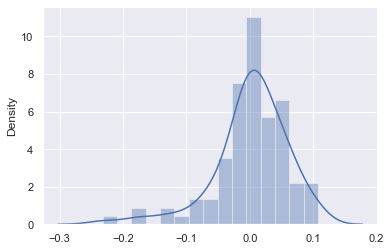

In [54]:
sns.distplot(error)

In [55]:
print("Mean of Errors {}".format(round(np.mean(error),5)))

Mean of Errors 0.00208


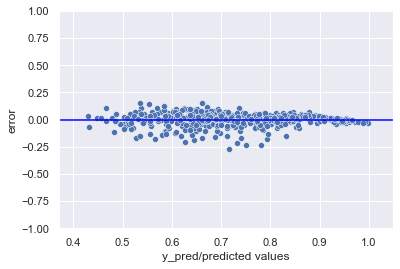

In [56]:
sns.scatterplot(Y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('error')
plt.xlabel('y_pred/predicted values')
plt.ylabel('error')
plt.ylim(-1,1)
plt.xlim(0.37,1.05)
p = sns.lineplot([0.37,1.05],[0,0],color='blue')

## 5.3 Comments on the performance measures and if there is any need to improve the model or not

* RMSE is a popular formula to measure the error rate of a regression model
* there is chance of 5 percent of error rate in predecting the chance of admit
* All other metrics have significant small error rate 
* R-squared and Adjusted R-squared are good and pretty close
* We have built a model with Adjusted R-squared value of 0.816 which is good , but there is a need to improve the model to provide the accurate results for the students

# 6.Actionable Insights & Recommendations

### Comments on significance of predictor variables

* Most of the people even getting good GRE/TOFEL score tend to join universities with  rating 3 might be because of less number of universities with rating 4 and 5 
* GRE,TOFEL scores and CGPA are more significant columns in predicting Chance of Admit
* Rest other columns such as SOP,LOR,University rating are less significant columns in predicting Chance of Admit


### Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model 

*	We have built a model with R-squared value of 0.816 which is good but we can still improve the including more number of significant variables such as program to be enrolled in Tuition fees, etc.
*	In the problem we were given to predict the probability of getting into only IVY league colleges, there are even other good colleges we can even take them into consideration so that we can guide the students to get into some good colleges instead of joining into universesities that doesnot have any significance of their career growth
*	if the Model implemented in the real world could be a game changer of many rural students or students who doesn’t have anyone to guide them to choose right and best college for the marks they have obtained
*	By the predictor model, even colleges can get an idea of programs in which students are more interested in so they can make certain arrangements to meet the needs
 